<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/notebooks/videos/Practica_2_2_Visualizacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar e instalar librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# para lectura de archivos
from google.colab import files
import io
import gdown


# Lectura de archivos

## A partir de un link


In [ ]:
# ID del archivo
file_id = "1GosUmEUd8V8P3u03HXdyfBtxSOMPYPXz"

url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx"

# Guardar y leer en pandas
output = "/content/cpt.xlsx"
df = pd.read_excel(url, sheet_name='Hoja1')



In [ ]:
uploaded = files.upload()

Saving Desplazamientos viga.txt to Desplazamientos viga.txt


In [ ]:
df.head()

,Depth\n(m),qc\n(Mpa),fs\n(kPa),u2\n(kPa)
0,0.07,0.27330,0.0,1.44149
1,0.08,0.36611,0.0,1.49410
2,0.09,0.46278,0.0,1.70454
3,0.10,0.63873,0.0,1.07322
4,0.11,0.81468,0.0,0.86279


In [ ]:
df.columns

Index(['Depth\n(m)', 'qc\n(Mpa)', 'fs\n(kPa)', 'u2\n(kPa)'], dtype='object')

# Matplotlib

## Plot

El gráfico tipo plot sirve para visualizar la evolución de una variable respecto a otra, por ejemplo, desplazamientos versus tiempo o profundidad.

En este caso vamos a graficar la resistencia de fuste en función de la profundidad para un ensayo CPT.

### Grafico tipo plot por default

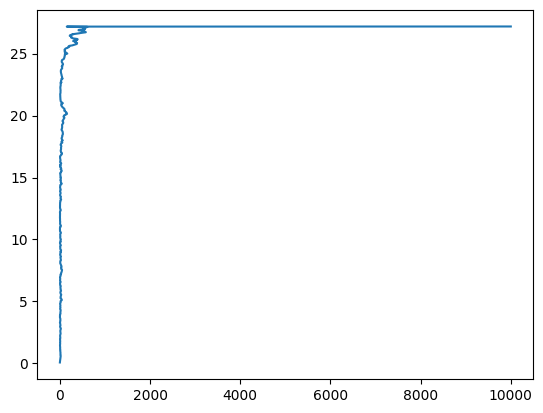

In [ ]:
depth = df['Depth\n(m)'].copy()
fs = df['fs\n(kPa)'].copy()

# Graficar
plt.plot(fs, depth)
plt.show()

### Gráfico tipo plot con ajustes estéticos

In [ ]:
# Vamos a plotear fs en función de la profundidad
depth = df['Depth\n(m)']
fs = df['fs\n(kPa)']

# Crear la figura con tamaño y estilo
plt.figure(figsize=(4.5, 8))  # ancho x alto en pulgadas

# Graficar fs vs Depth
plt.plot(fs, depth,
         color="blue",        # color de la línea
         linestyle="-",       # tipo de línea
         linewidth=1,       # grosor
         marker="",           # marcador
         markersize=1,        # tamaño de marcadores
         label="Ensayo CPT")   # etiqueta para leyenda

# Configuración de ejes
plt.xlabel("Fricción [kPa]", fontsize=12) #fontsize es el tamaño de letra
plt.ylabel("Profundidad [m]", fontsize=12)

# Límites de los ejes
plt.xlim(0, 700)
plt.ylim(depth.min(), depth.max())

# En geotecnia, es frecuente graficar la profundidad creciente hacia abajo
plt.gca().invert_yaxis()

# Grilla y configuracion de ejes
plt.grid(True, which="both", linestyle="--", alpha=0.6)
plt.yticks(np.arange(0, 31, 5)) #el eje y va de 0 a 30 y muestra valores de 5 en 5
plt.xticks(np.arange(0, 701, 100)) #el eje x va de 0 a 700 y muestra valores de 100 en 100
plt.tick_params(axis="both", labelsize=10)

# Leyenda y título
plt.legend(loc="best", fontsize=10) #ubicacion y tamaño
plt.title("Gráfico tipo 'plot'", fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

KeyError: 'Depth\n(m)'

## Barras

El gráfico de barras se utiliza cuando queremos graficar un fenomeno donde tenemos variables categóricas y numéricas.

En este caso, vamos a ver los desplazamientos en 4 vigas de una estructura para distintos estados de carga. Tenemos dos variables categóricas (viga y caso de carga) y una numérica (desplazamiento vertical).

In [ ]:
vigas = ["Viga 1", "Viga 2", "Viga 3", "Viga 4"]
casos = ["1.4 D", "1.2D+1.6L", "1.2D+1.0E+0.5L", "0.9D+1.6W"]
desplazamientos = [
    [12, 20, 15, 10], # Viga 1
    [18, 25, 22, 14], # Viga 2
    [10, 15, 12, 8],  # Viga 3
    [14, 22, 18, 12]  # Viga 4
]

# Crear DataFrame
df = pd.DataFrame(desplazamientos, columns=casos, index=vigas)
df = df.reset_index().rename(columns={'index': 'Viga'})

df

,Viga,1.4 D,1.2D+1.6L,1.2D+1.0E+0.5L,0.9D+1.6W
0,Viga 1,12,20,15,10
1,Viga 2,18,25,22,14
2,Viga 3,10,15,12,8
3,Viga 4,14,22,18,12


In [ ]:
df_melt = df.melt(id_vars='Viga', var_name='Caso de carga', value_name='Desplazamiento [mm]')

df_melt

,Viga,Caso de carga,Desplazamiento [mm]
0,Viga 1,1.4 D,12
1,Viga 2,1.4 D,18
2,Viga 3,1.4 D,10
3,Viga 4,1.4 D,14
4,Viga 1,1.2D+1.6L,20
5,Viga 2,1.2D+1.6L,25
6,Viga 3,1.2D+1.6L,15
7,Viga 4,1.2D+1.6L,22
8,Viga 1,1.2D+1.0E+0.5L,15
9,Viga 2,1.2D+1.0E+0.5L,22


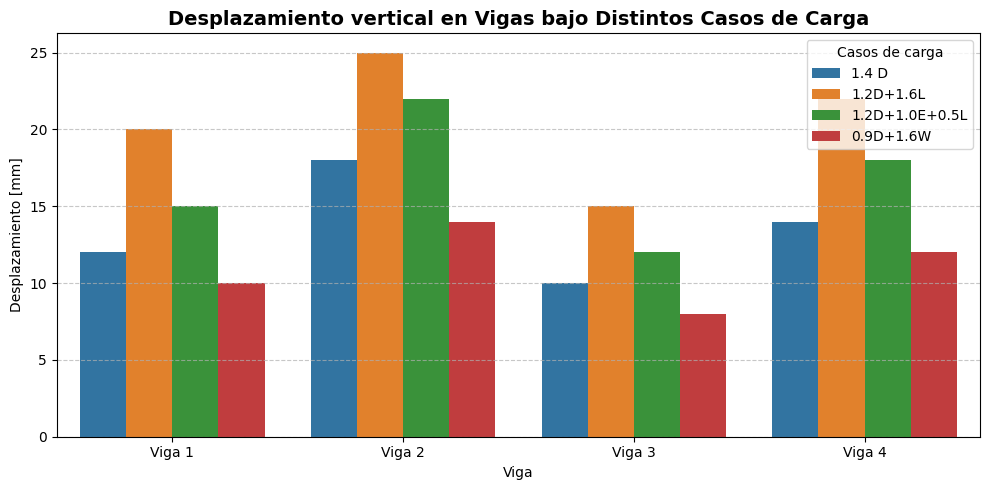

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_melt, x='Viga', y='Desplazamiento [mm]', hue='Caso de carga')
plt.title("Desplazamiento vertical en Vigas bajo Distintos Casos de Carga", fontsize=14, weight='bold')
plt.xlabel("Viga")
plt.ylabel("Desplazamiento [mm]")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Casos de carga")
plt.tight_layout()
plt.show()

## Scatterplot

El scatterplot nos permite comparar dos variables numéricas que no se encuentran ordenadas de ninguna manera en particular. Por ejemplo, desplazamientos en una fase intermedia versus la etapa final.

  En este caso, partir de resultados de deformaciones en un tabique submural, se comparan los desplazamientos en una etapa intermedia de excavación y los desplazamientos en la etapa final.



In [ ]:
# ID del archivo

file_id = "1O9WusJhEkakMD8e1rHhjDdkPxq2Cifid"

url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx"

# Guardar y leer en pandas
output = "/content/Desplazamientos.xlsx"
df1 = pd.read_excel(url, sheet_name='Sheet1')

In [ ]:
df1.head()
# len(df1)

,Fase,Ux nodo más alto [mm],Uy nodo más alto [mm],U total nodo más alto [mm]
0,Tabique 1 [Phase_5],0.385054,-1.534158,1.581742
1,Exc.2 [Phase_6],0.276008,-1.584813,1.608668
2,Berma 2 [Phase_7],0.194998,-1.690337,1.701548
3,Tabique 2 [Phase_8],-0.098068,-2.454013,2.455972
4,Exc.3 [Phase_9],-0.611244,-2.913822,2.977244


In [ ]:
df1.rename(columns={
    'Ux nodo más alto [mm]': 'Ux [mm]',
    'Uy nodo más alto [mm]': 'Uy [mm]',
    'U total nodo más alto [mm]': 'U total [mm]'
}, inplace=True)

# Filtrar por fase
fase3 = df1[df1['Fase'] == 'Tabique 3 [Phase_11]']['U total [mm]'].reset_index(drop=True)
fase5 = df1[df1['Fase'] == 'Tabique 5 [Phase_17]']['U total [mm]'].reset_index(drop=True)

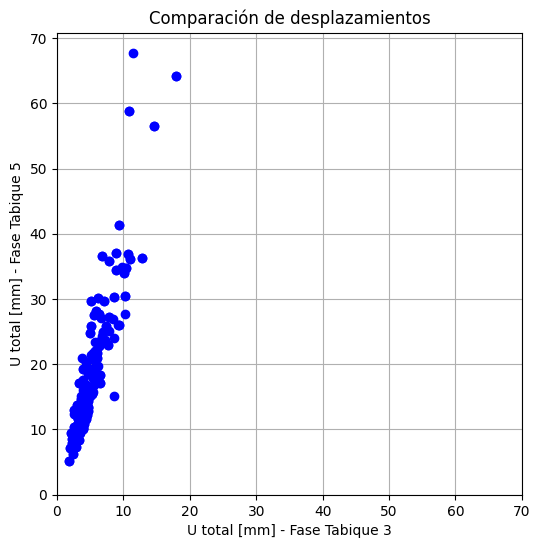

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(fase3, fase5, color="blue", alpha=1,zorder=3)

plt.xlabel("U total [mm] - Fase Tabique 3")
plt.ylabel("U total [mm] - Fase Tabique 5")
plt.yticks(np.arange(0, 70+1, 10))
plt.xticks(np.arange(0, 70+1, 10))
plt.title("Comparación de desplazamientos")

plt.grid(True)
plt.show()

In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['Desplazamientos viga.txt']))

df

,Carga_kN,Desplazamiento_mm,Seccion
0,12.289249,0.696717,h1: 45 cm
1,33.397564,3.508677,h1: 45 cm
2,23.152277,2.213118,h1: 45 cm
3,31.703955,4.401383,h1: 45 cm
4,39.339685,5.317049,h1: 45 cm
...,...,...,...
75,27.245878,2.563962,h2: 50 cm
76,15.085712,1.016859,h2: 50 cm
77,33.466905,2.283706,h2: 50 cm
78,35.709269,2.413529,h2: 50 cm


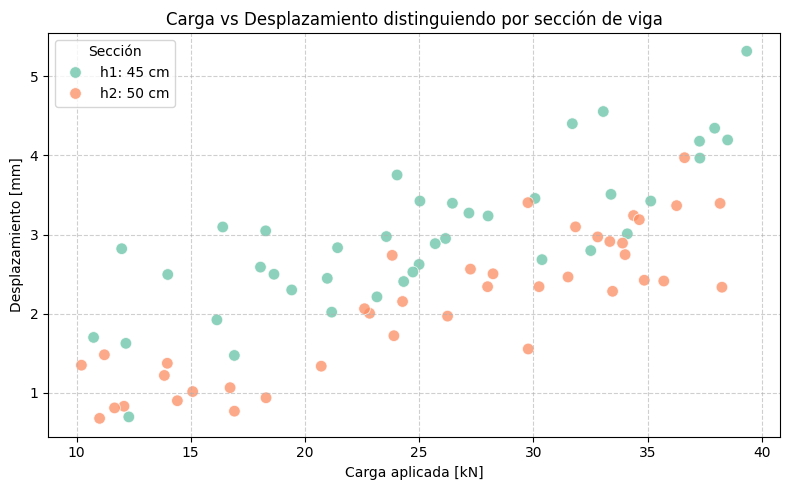

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,
                x='Carga_kN',
                y='Desplazamiento_mm',
                hue='Seccion',
                palette='Set2',
                alpha=0.75,
                s=70)

plt.title('Carga vs Desplazamiento distinguiendo por sección de viga')
plt.xlabel('Carga aplicada [kN]')
plt.ylabel('Desplazamiento [mm]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Sección")
plt.tight_layout()
plt.show()

## Histplot

Este gráfico es util para ver la distribución de una determinada variable. Además, nos permite ver facilmente si existen valores que se alejan mucho del resto.

En este caso, se va a graficar el histograma de los desplazamientos en el tabique submural para una etapa intermedia.

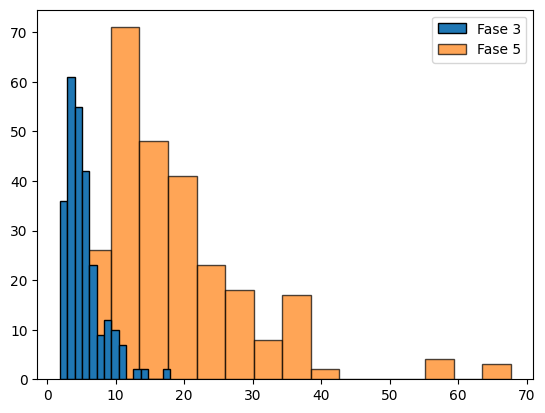

In [ ]:
plt.hist(fase3, bins=15, edgecolor="black", alpha=1,label='Fase 3',zorder=2);
plt.hist(fase5, bins=15, edgecolor="black", alpha=0.7,label='Fase 5',zorder=1);
plt.legend()


In [ ]:
file_id = "1MrtxFG56WWlelueJmj-AM7uaUrHD-Dhc"
url = f"https://drive.google.com/uc?id={file_id}"

# Descargar
output = "/content/Fm Pampeano.csv"
gdown.download(url, output, quiet=False)

# Leer en pandas
df2 = pd.read_csv(output)
df2.head()

Downloading...
From: https://drive.google.com/uc?id=1MrtxFG56WWlelueJmj-AM7uaUrHD-Dhc
To: /content/Fm Pampeano.csv
100%|██████████| 16.5k/16.5k [00:00<00:00, 5.59MB/s]


,G0Ref,cRef,phi,EURRef,E50Ref,EOedRef
0,407412.871680,24.369836,26.934467,353091.155456,117697.051819,117697.051819
1,396416.076926,14.315434,29.672615,343560.600002,114520.200001,114520.200001
2,338841.355618,25.271267,33.657419,293662.508202,97887.502734,97887.502734
3,217825.045312,12.763155,34.796195,188781.705937,62927.235312,62927.235312
4,323361.181615,17.352051,29.537759,280246.357400,93415.452467,93415.452467


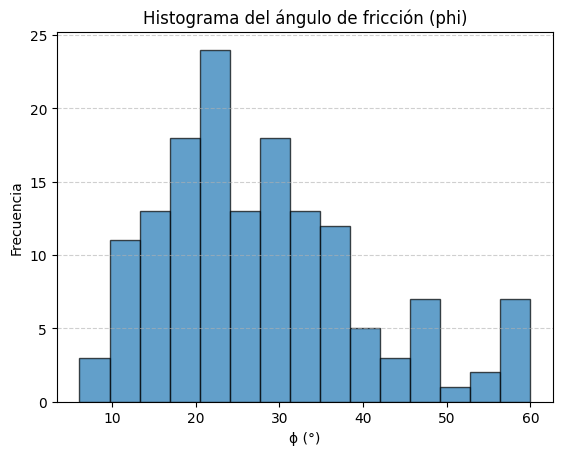

In [ ]:
# plt.figure(figsize=(6,4))
plt.hist(df2['cRef'], bins=15, edgecolor="black", alpha=0.7)

plt.xlabel("ϕ (°)")
plt.ylabel("Frecuencia")
plt.title("Histograma del ángulo de fricción (phi)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Seaborn

## Boxplot

El gráfico tipo boxplot nos permite graficar conjuntos de valores que pertenecen a una cierta categoria, poder compararlos entre si y tener una idea de cual es su distribución. Nos muestra la media y los valores asociados a un fractil del 25 y 75%.

En este caso vamos a ver la distribución de resistencias no drenadas para tres suelos distintos.

/tmp/ipython-input-1382196115.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Suelo", y="Su_kPa", data=data_box, palette="Set2")


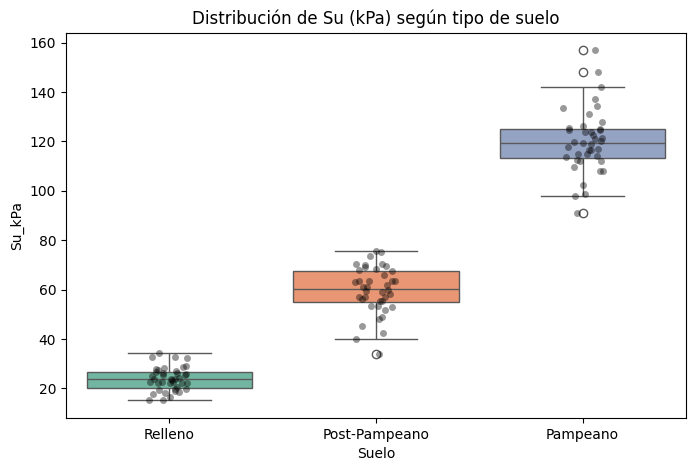

In [ ]:
np.random.seed(42)
data_box = pd.DataFrame({
    "Suelo": np.repeat(["Relleno", "Post-Pampeano", "Pampeano"], 40),
    "Su_kPa": np.concatenate([
        np.random.normal(25, 5, 40),   # Relleno
        np.random.normal(60, 10, 40),  # Post-Pampeano
        np.random.normal(120, 15, 40)  # Pampeano
    ])
})

plt.figure(figsize=(8,5))
sns.boxplot(x="Suelo", y="Su_kPa", data=data_box, palette="Set2")
sns.stripplot(x="Suelo", y="Su_kPa", data=data_box, color="black", alpha=0.4)
plt.title("Distribución de Su (kPa) según tipo de suelo")
plt.show()

## Violinplot

/tmp/ipython-input-1313790696.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Profundidad (m)", y="N_SPT", data=data_violin, palette="muted");


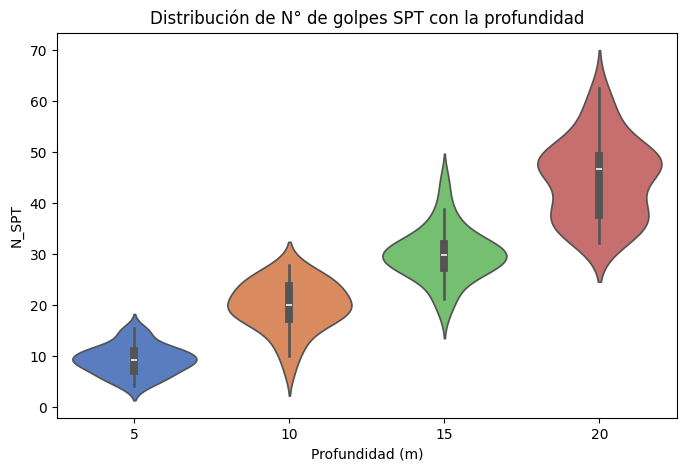

In [ ]:
np.random.seed(42)
data_violin = pd.DataFrame({
    "Profundidad (m)": np.repeat([5, 10, 15, 20], 40),
    "N_SPT": np.concatenate([
        np.random.normal(10, 3, 40),   # 5 m
        np.random.normal(20, 5, 40),   # 10 m
        np.random.normal(30, 6, 40),   # 15 m
        np.random.normal(45, 8, 40)    # 20 m
    ])
})

plt.figure(figsize=(8,5))
sns.violinplot(x="Profundidad (m)", y="N_SPT", data=data_violin, palette="muted");
# sns.violinplot(x="Profundidad (m)", y="N_SPT", data=data_violin, palette="muted",inner='point');
# sns.swarmplot(x="Profundidad (m)", y="N_SPT", data=data_violin, color="k", alpha=0.6);
plt.title("Distribución de N° de golpes SPT con la profundidad");
# plt.ylim(4)
plt.show();

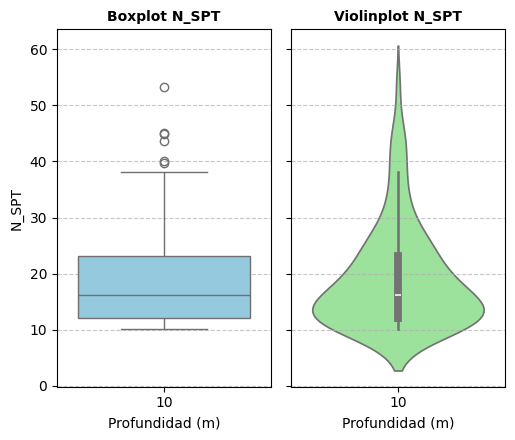

In [ ]:
np.random.seed(42)
data_skewed = pd.DataFrame({
    "Profundidad (m)": np.repeat([10], 100),
    "N_SPT": np.random.exponential(scale=10, size=100) + 10   # desplazada hacia valores > 10
})

# Crear figura con 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7*0.75, 6*0.75), sharey=True)

# Boxplot
sns.boxplot(data=data_skewed, x="Profundidad (m)", y="N_SPT", ax=ax1, color="skyblue")
ax1.set_title("Boxplot N_SPT", fontsize=10, weight="bold")
ax1.grid(axis="y", linestyle="--", alpha=0.7)
# sns.swarmplot(data=data_skewed, x="Profundidad (m)", y="N_SPT", color="k", alpha=0.6, ax=ax1)

# Violinplot
sns.violinplot(data=data_skewed, x="Profundidad (m)", y="N_SPT", ax=ax2, color="lightgreen")
ax2.set_title("Violinplot N_SPT", fontsize=10, weight="bold")
ax2.grid(axis="y", linestyle="--", alpha=0.7)
# sns.swarmplot(data=data_skewed, x="Profundidad (m)", y="N_SPT",color="k", alpha=0.6, ax=ax2)

plt.tight_layout()
plt.show()


## Heatmap

Este tipo de gráfico nos sirve para ver que tan lineal es la relación entre dos variables numéricas. No nos dice nada respecto a si las variables se encuentran relacionadas de otra forma.

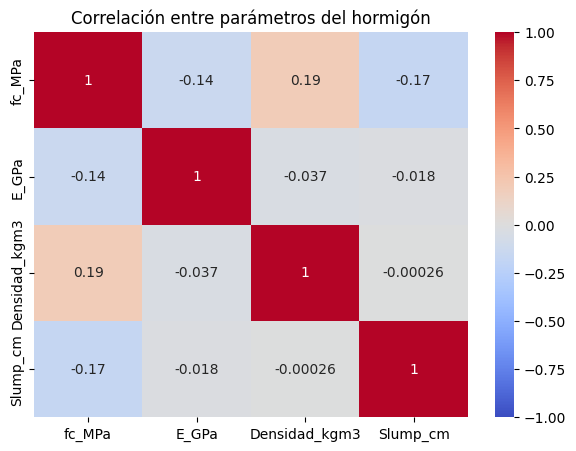

In [ ]:
np.random.seed(42)
data_heat = pd.DataFrame({
    "fc_MPa": np.random.normal(30, 5, 100),    # resistencia a compresión
    "E_GPa": np.random.normal(25, 3, 100),     # módulo de elasticidad
    "Densidad_kgm3": np.random.normal(2400, 50, 100), #Densidad en kg/m3
    "Slump_cm": np.random.normal(10, 3, 100)   # consistencia
})

# Calcular correlación
corr = data_heat.corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlación entre parámetros del hormigón")
plt.show()

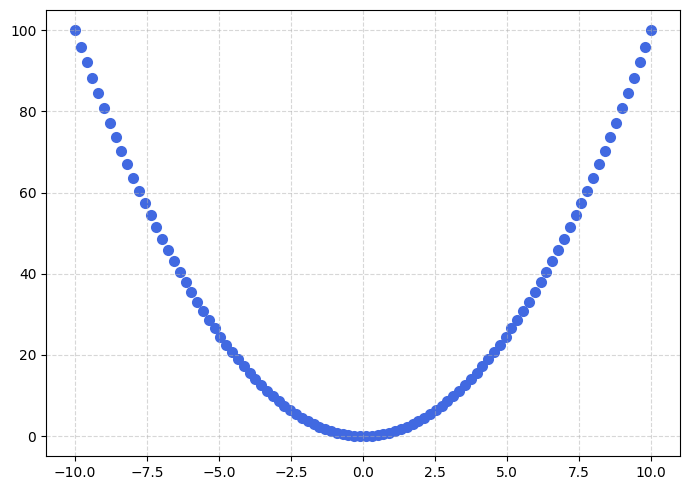

In [ ]:
x = np.linspace(-10, 10, 100)
y = x**2

plt.figure(figsize=(7,5))
plt.scatter(x, y, color='royalblue', linewidth=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()